<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/10_Time_series_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series forecasting fundamentals with tensorflow + Milestone Project: 3

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-05-29 11:19:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-05-29 11:19:26 (7.37 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', index_col=['Date'], parse_dates=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.columns = ['currency', 'close', 'opne', 'high', 'low']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   currency  2787 non-null   object 
 1   close     2787 non-null   float64
 2   opne      2787 non-null   float64
 3   high      2787 non-null   float64
 4   low       2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
df.columns

Index(['currency', 'close', 'opne', 'high', 'low'], dtype='object')

In [6]:
df.isnull().sum()

currency    0
close       0
opne        0
high        0
low         0
dtype: int64

In [7]:

# Only want closing price for each day
bf = pd.DataFrame(df["close"]).rename(columns={"close": "price"})
bf.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


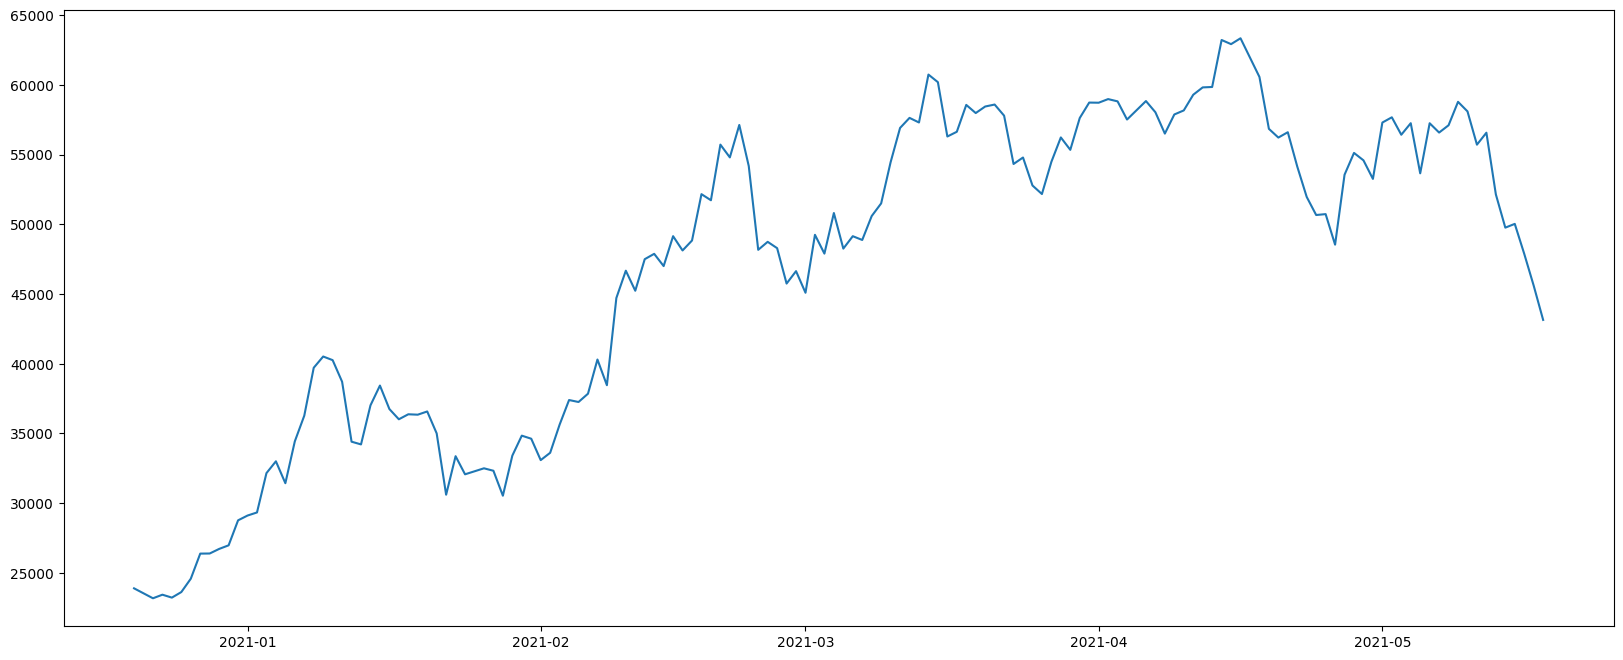

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot(df.index[-150:], df['close'][-150:])

##Split the dataset

In [9]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

In [10]:
from sklearn.model_selection import train_test_split

X = df.index
y = df.close

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
len(X_train), len(X_test)

(2229, 558)

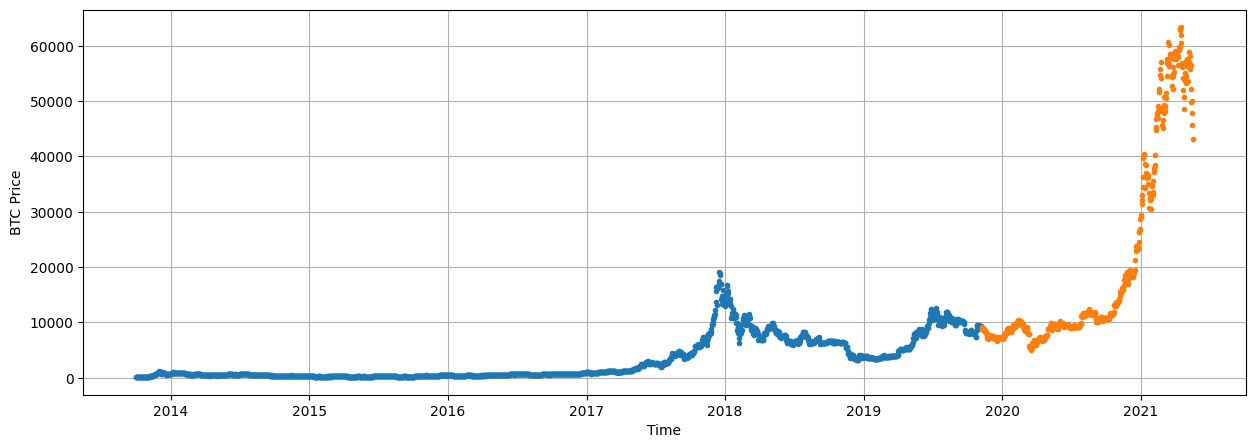

In [11]:
plt.figure(figsize=(15, 5))
plot_time_series(X_train, y_train)
plot_time_series(X_test, y_test)

##Model Experiments

Termes to be fimilier with:
* **Horizen**: number of timesteps into the future we're going to predict.
* **Window size**: number of timesteps we are going to use to predict.

Models:
* 1.Naive Bayes (baseline)
* 2.Dense Model (Horizen=1, window=7)
* 3.Same as Model2 (Horizen=1, window=30)
* 4.Same as Model2 (Horizen=7, window=30)
* 5.Conv1D
* 6.LSTM
* 7.Same as Model 2 but with multivariet data
* 8.N-BEATS algorithm
* 9.Ensemble (multiple models stacked togather)
* 10.Future prediction model
* 11.Same as Model 1

### Model_1 Naive Bayes Model

Formula:
$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - This is the Horizen of 1.

In [12]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(Date
 2019-11-08    9226.485821
 2019-11-09    8794.358645
 2019-11-10    8798.042055
 2019-11-11    9081.186878
 2019-11-12    8711.534339
 2019-11-13    8760.892718
 2019-11-14    8749.520591
 2019-11-15    8656.970922
 2019-11-16    8500.643558
 2019-11-17    8469.260899
 Name: close, dtype: float64,
 Date
 2021-05-08    57107.120672
 2021-05-09    58788.209679
 2021-05-10    58102.191426
 2021-05-11    55715.546651
 2021-05-12    56573.555472
 2021-05-13    52147.821187
 2021-05-14    49764.132082
 2021-05-15    50032.693137
 2021-05-16    47885.625255
 2021-05-17    45604.615754
 Name: close, dtype: float64)

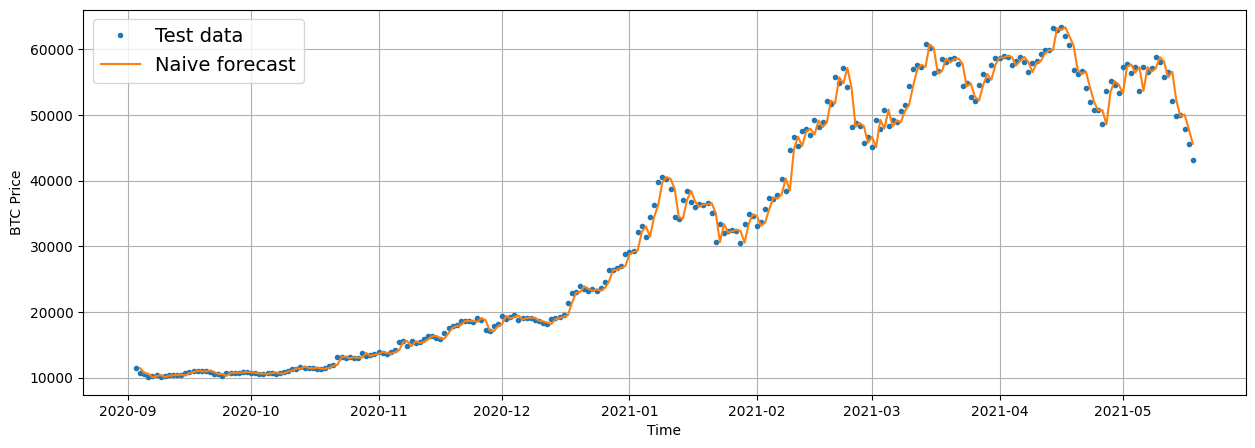

In [13]:
# Plot naive forecast
plt.figure(figsize=(15, 5))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, start=300, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], start=300, values=naive_forecast, format="-", label="Naive forecast")

### Some common Evaluating metrics
* MAE - Mean Absolute error
* MSE - Mean Squared error
* Root MSE - root(MSE)
* Mean Absolute Percentage Error
* Mean Absolute Scaled Error (MASE)

>Resourse: https://otexts.com/fpp3/accuracy.html#percentage-errors


In [14]:
import tensorflow as tf

In [15]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [16]:
mean_absolute_scaled_error(y_test[1:].values, naive_forecast.values).numpy()

0.9995699939182624

In [17]:
## Creating the evaluation matrix function
def calculate_evaluation_metrics(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [18]:
naive_bayes_eval = calculate_evaluation_metrics(y_test[1:].values, naive_forecast.values)
naive_bayes_eval

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Format Dataset: Windowing our dataset

In [19]:
btc_price = df.close.to_numpy()

In [20]:
btc_price

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [21]:
print(f"We want to use {btc_price[:7]}, to predict this: {btc_price[7]}")

We want to use [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ], to predict this: 123.033


In [22]:
HORIZON = 1
WINDOW = 7

In [23]:
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[: , -horizon:]

In [24]:
data, label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))

In [25]:
tf.squeeze(data[0]).numpy(), tf.squeeze(label[0]).numpy()

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), 7)

In [26]:
data = tf.squeeze(data).numpy()
label = tf.squeeze(label).numpy()

In [27]:
data, label

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), 7)

In [28]:
prices = btc_price

In [29]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [30]:
full_windows, full_labels = make_windows(btc_price, window_size=WINDOW, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [31]:
## View first 3
for i in range(3):
  print(full_windows[i], full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


### Turning the windows and labels into train_data and test_data


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels, test_size=0.2, shuffle=False)
len(X_train), len(X_test)

(2224, 556)

### Building model checkpoint

In [33]:
import os
def model_checkpoint(model_name, path='model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(os.path.join(path, model_name),
                                            save_best_only=True,
                                            save_freq='epoch')

## Model_1: Dense model with window=7, horizon=1

In [34]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 128, activation='relu'),
    tf.keras.layers.Dense(units=HORIZON, activation='linear')
])

model.compile(loss='mae',
              optimizer='Adam',
              metrics=['mae', 'mse'])

history_1 = model.fit(X_train,
                      y_train,
                      epochs=100,
                      batch_size=128,
                      verbose=0,
                      validation_data=(X_test, y_test),
                      callbacks=[model_checkpoint('model_1')])

In [35]:
model_1 = tf.keras.models.load_model('model_experiment/model_1/')
model_1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 578.1647 - mae: 578.1647 - mse: 1191063.5000


[578.1646728515625, 578.1646728515625, 1191063.5]

In [36]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [37]:
## Making some predictions
model_1_preds = make_preds(model_1, X_test)

18/18 [==============================] - 0s 2ms/step


In [38]:
for i in range(10):
  print(f"Actual: {y_test[i]} Predicted: {model_1_preds[i]}")

Actual: [8798.04205463] Predicted: 8911.9833984375
Actual: [9081.18687849] Predicted: 8803.94140625
Actual: [8711.53433917] Predicted: 8993.4765625
Actual: [8760.89271814] Predicted: 8845.521484375
Actual: [8749.52059102] Predicted: 8779.482421875
Actual: [8656.97092235] Predicted: 8680.08203125
Actual: [8500.64355816] Predicted: 8745.69140625
Actual: [8469.2608989] Predicted: 8550.2021484375
Actual: [8537.33965197] Predicted: 8463.28515625
Actual: [8205.80636599] Predicted: 8533.6474609375


In [39]:
y_test.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [40]:
calculate_evaluation_metrics(tf.squeeze(y_test), model_1_preds)

{'mae': 578.16473,
 'mse': 1191063.6,
 'rmse': 1091.3586,
 'mape': 2.6095393,
 'mase': 1.0156753}

In [41]:
naive_bayes_eval

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [42]:
len(naive_forecast.index), len(y_test)

(557, 556)

In [43]:
naive_forecast[-1], y_test[-2]

(45604.6157536131, array([45604.61575361]))

In [44]:
y_test.shape,

((556, 1),)

In [45]:
len(y_test), len(model_1_preds)

(556, 556)

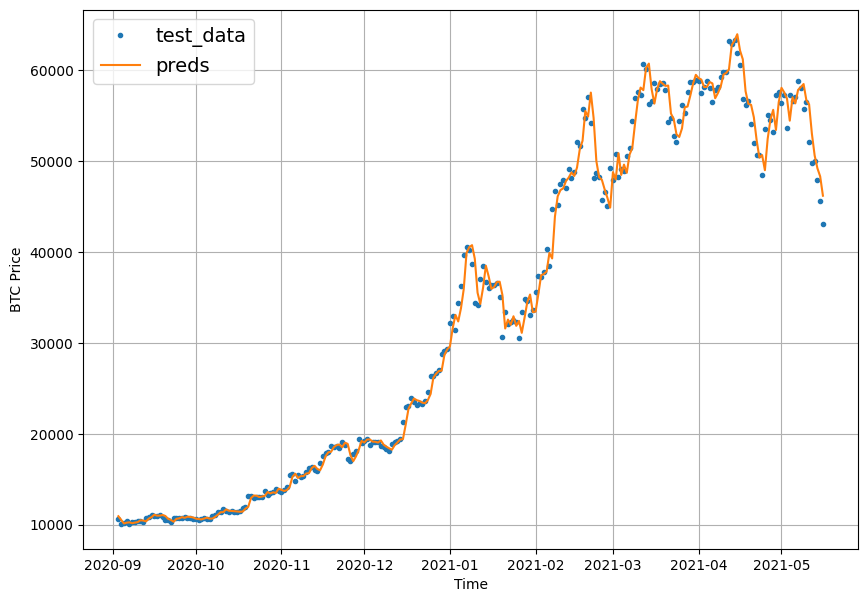

In [46]:
## Plotting the model performance
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=naive_forecast.index[:-1],
                 values = tf.squeeze(y_test),
                 start=offset,
                 label='test_data')

plot_time_series(timesteps=naive_forecast.index[:-1],
                 values=model_1_preds,
                 label='preds',
                 start=offset,
                 format='-')

## Model_2: Dense (WINDOW=30 HORIZON=1)

In [47]:
HORIZON = 1
WINDOW_SIZE = 30

In [48]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
full_windows[0], full_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499]))

In [49]:
## Dividing it into training and testing
X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels, test_size=0.2, shuffle=False)
len(X_train), len(X_test)

(2205, 552)

In [50]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

model_2.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae', 'mse'])

history_2 = model_2.fit(X_train, y_train,
                        epochs=100,
                        batch_size=128,
                        verbose=0,
                        validation_data=(X_test, y_test),
                        callbacks=[model_checkpoint("Model_2")])

In [51]:
model_2.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 644.9982 - mae: 644.9982 - mse: 1335629.3750


[644.9982299804688, 644.9982299804688, 1335629.375]

In [52]:
model_2 = tf.keras.models.load_model('/content/model_experiment/Model_2')

In [53]:
model_2.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 604.2285 - mae: 604.2285 - mse: 1241574.2500


[604.228515625, 604.228515625, 1241574.25]

In [54]:
## Making some predictions
model_2_preds = make_preds(model_2, X_test)

18/18 [==============================] - 0s 2ms/step


In [55]:
for i in range(10):
  print(tf.squeeze(y_test[i]).numpy(), model_2_preds[i].numpy())

8749.520591019 8852.086
8656.970922354 8824.305
8500.6435581622 8759.107
8469.2608988992 8615.117
8537.3396519676 8364.955
8205.8063659942 8334.069
8118.4885358003 8147.621
8074.8431736099 8313.5
7612.7405735024 8115.325
7262.1105349483 7771.832


In [56]:
calculate_evaluation_metrics(tf.squeeze(y_test), model_2_preds)

{'mae': 604.2286,
 'mse': 1241574.2,
 'rmse': 1114.2595,
 'mape': 2.7428854,
 'mase': 1.0561975}

In [57]:
len(model_2_preds), len(y_test), len(naive_forecast.index)

(552, 552, 557)

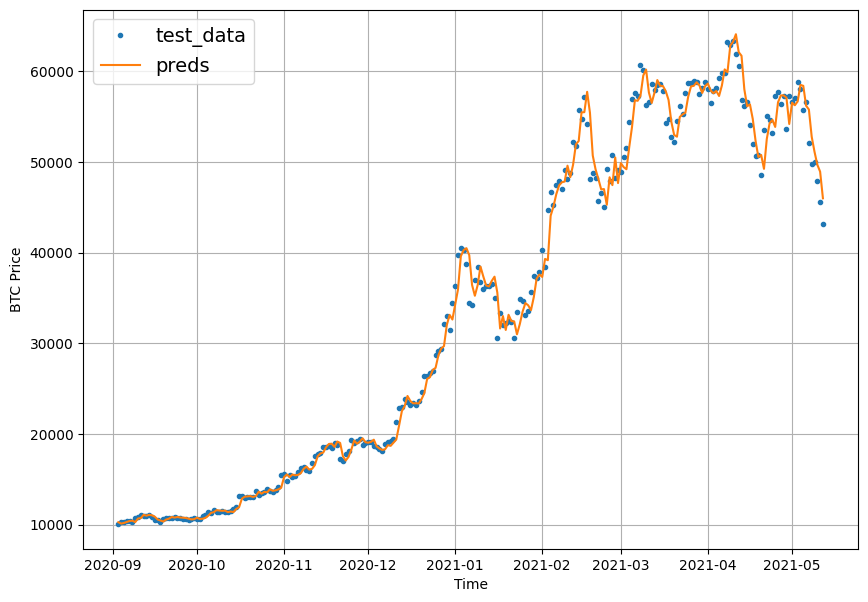

In [58]:
## Plotting the model performance
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=naive_forecast.index[:-5],
                 values = tf.squeeze(y_test),
                 start=offset,
                 label='test_data')

plot_time_series(timesteps=naive_forecast.index[:-5],
                 values=model_2_preds,
                 label='preds',
                 start=offset,
                 format='-')

## Model_3: Dense (WINDOW=30, HORIZON=7)

In [59]:
HORIZON = 7
WINDOW_SIZE = 30

In [60]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
full_windows[0], full_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333]))

In [61]:
## Dividing it into training and testing
X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels, test_size=0.2, shuffle=False)
len(X_train), len(X_test)

(2200, 551)

In [62]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

model_3.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae', 'mse'])

history_3 = model_3.fit(X_train, y_train,
                        epochs=100,
                        batch_size=128,
                        verbose=0,
                        validation_data=(X_test, y_test),
                        callbacks=[model_checkpoint("Model_3")])

In [63]:
model_3.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1315.0967 - mae: 1315.0967 - mse: 5661095.5000


[1315.0966796875, 1315.0966796875, 5661095.5]

In [64]:
model_3 = tf.keras.models.load_model('/content/model_experiment/Model_3')

In [65]:
model_3.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 1218.9695 - mae: 1218.9695 - mse: 5424010.5000


[1218.969482421875, 1218.969482421875, 5424010.5]

In [66]:
## Making some predictions
model_3_preds = make_preds(model_3, X_test)

18/18 [==============================] - 0s 2ms/step


In [67]:
for i in range(10):
  print(tf.squeeze(y_test[i]).numpy(), model_3_preds[i].numpy())

[8794.35864452 8798.04205463 9081.18687849 8711.53433917 8760.89271814
 8749.52059102 8656.97092235] [9115.507  9290.262  9401.9795 9506.984  9544.722  9665.545  9720.4795]
[8798.04205463 9081.18687849 8711.53433917 8760.89271814 8749.52059102
 8656.97092235 8500.64355816] [8905.088 9059.224 9228.929 9341.755 9230.224 9318.703 9275.143]
[9081.18687849 8711.53433917 8760.89271814 8749.52059102 8656.97092235
 8500.64355816 8469.2608989 ] [8809.338  8872.723  8988.2705 9215.409  9074.885  9088.762  9118.035 ]
[8711.53433917 8760.89271814 8749.52059102 8656.97092235 8500.64355816
 8469.2608989  8537.33965197] [9042.429 8956.023 9265.197 9412.927 9307.427 9294.524 9435.77 ]
[8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989
 8537.33965197 8205.80636599] [8802.968 9000.818 8969.689 9243.733 9090.537 9329.74  9469.476]
[8749.52059102 8656.97092235 8500.64355816 8469.2608989  8537.33965197
 8205.80636599 8118.4885358 ] [8751.958 8982.54  8958.311 9279.45  9120.323 9223.068 9

In [68]:
y_test.shape, model_3_preds.shape

((551, 7), TensorShape([551, 7]))

In [69]:
calculate_evaluation_metrics(tf.squeeze(y_test), model_3_preds)

{'mae': array([ 670.4248  ,  449.17145 ,  397.30148 ,  618.305   ,  575.2182  ,
         636.81256 ,  595.13446 ,  467.54987 ,  540.80896 ,  634.99945 ,
         900.5644  ,  961.3253  ,  963.05334 ,  873.2652  ,  642.67035 ,
         213.8789  ,  130.31096 ,  190.72461 ,  240.04541 ,  256.41162 ,
         256.39508 ,  266.65695 ,  257.36313 ,  253.67041 ,  130.57848 ,
         103.07659 ,  114.246376,  206.86914 ,  241.63045 ,  317.68668 ,
         388.81216 ,  493.21674 ,  378.2897  ,  374.91525 ,  363.33572 ,
         347.1721  ,  387.47272 ,  290.9465  ,  215.99324 ,  150.37535 ,
         467.50732 ,   82.91211 ,  163.4878  ,  156.33914 ,  198.52449 ,
         143.32967 ,   98.31208 ,  114.40339 ,  115.70863 ,  192.6444  ,
         212.76549 ,  217.49547 ,  323.33984 ,  177.8667  ,  214.12074 ,
         282.7818  ,  508.2971  ,  470.01578 ,  355.6958  ,  405.768   ,
         262.00998 ,  139.17188 ,  233.4114  ,  305.7023  ,  303.55182 ,
         324.65073 ,  326.9183  ,  423.27246

### Make our evaluation function work for large horizon

In [70]:
## Creating the evaluation matrix function
def calculate_evaluation_metrics(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [71]:
model_3_preds = make_preds(model_3, X_test)

18/18 [==============================] - 0s 2ms/step


In [72]:
for i in range(10):
  print(y_test[i], model_3_preds[i])

[8794.35864452 8798.04205463 9081.18687849 8711.53433917 8760.89271814
 8749.52059102 8656.97092235] tf.Tensor([9115.507  9290.262  9401.9795 9506.984  9544.722  9665.545  9720.4795], shape=(7,), dtype=float32)
[8798.04205463 9081.18687849 8711.53433917 8760.89271814 8749.52059102
 8656.97092235 8500.64355816] tf.Tensor([8905.088 9059.224 9228.929 9341.755 9230.224 9318.703 9275.143], shape=(7,), dtype=float32)
[9081.18687849 8711.53433917 8760.89271814 8749.52059102 8656.97092235
 8500.64355816 8469.2608989 ] tf.Tensor([8809.338  8872.723  8988.2705 9215.409  9074.885  9088.762  9118.035 ], shape=(7,), dtype=float32)
[8711.53433917 8760.89271814 8749.52059102 8656.97092235 8500.64355816
 8469.2608989  8537.33965197] tf.Tensor([9042.429 8956.023 9265.197 9412.927 9307.427 9294.524 9435.77 ], shape=(7,), dtype=float32)
[8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989
 8537.33965197 8205.80636599] tf.Tensor([8802.968 9000.818 8969.689 9243.733 9090.537 9329.74  9469.

In [73]:
model_3_results = calculate_evaluation_metrics(tf.squeeze(y_test), model_3_preds)
model_3_results

{'mae': 1218.9695,
 'mse': 5424010.0,
 'rmse': 1405.7128,
 'mape': 5.5572395,
 'mase': 2.169088}

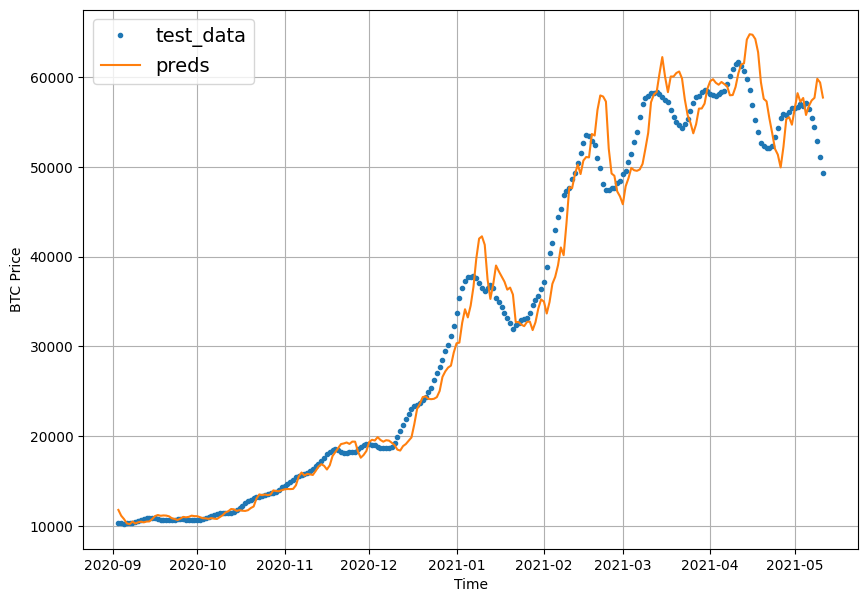

In [74]:
## Plotting the model performance
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=naive_forecast.index[:-6],
                 values = tf.reduce_mean(y_test, axis=1),
                 start=offset,
                 label='test_data')

plot_time_series(timesteps=naive_forecast.index[:-6],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 label='preds',
                 start=offset,
                 format='-')

## Model_4: Conv1D

In [75]:
HORIZON = 1
WINDOW_SIZE = 7

In [76]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels, test_size=0.2, shuffle=False)

In [78]:
len(X_train), len(X_test)

(2224, 556)

In [79]:
x = tf.constant(X_train[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [80]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [81]:
x.shape, expand_dims_layer(x).shape

(TensorShape([7]), TensorShape([7, 1]))

In [82]:
tf.random.set_seed(42)

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

model_4.compile(loss='mae',
              optimizer='Adam',
              metrics=['mae', 'mse'])

model_4.fit(X_train, y_train,
            epochs=100,
            batch_size=32,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[model_checkpoint('Model_4')])

In [83]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
model_4.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 570.1318 - mae: 570.1318 - mse: 1170472.2500


[570.1318359375, 570.1318359375, 1170472.25]

In [85]:
model_4_preds = model_4.predict(X_test)

18/18 [==============================] - 0s 2ms/step


In [86]:
model_4 = tf.keras.models.load_model('/content/model_experiment/Model_4')

In [87]:
model_4.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 563.8019 - mae: 563.8019 - mse: 1157093.2500


[563.8019409179688, 563.8019409179688, 1157093.25]

In [88]:
model_4_results = calculate_evaluation_metrics(y_test, model_4_preds)
model_4_results

{'mae': 17175.668,
 'mse': 617039600.0,
 'rmse': 17175.668,
 'mape': 113.73007,
 'mase': 30.172892}

In [89]:
model_3_results

{'mae': 1218.9695,
 'mse': 5424010.0,
 'rmse': 1405.7128,
 'mape': 5.5572395,
 'mase': 2.169088}

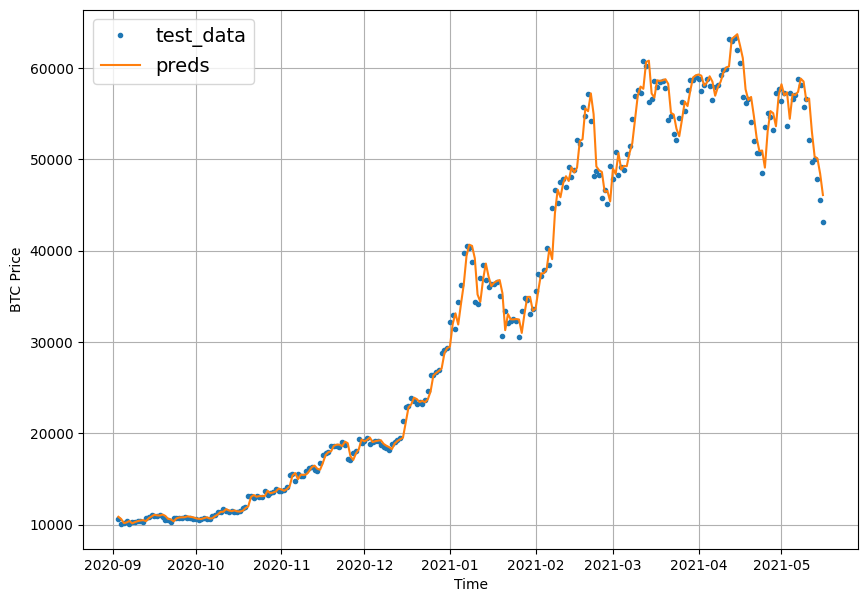

In [90]:
## Plotting the model performance
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=naive_forecast.index[:-1],
                 values = tf.reduce_mean(y_test, axis=1),
                 start=offset,
                 label='test_data')

plot_time_series(timesteps=naive_forecast.index[:-1],
                 values=tf.reduce_mean(model_4_preds, axis=1),
                 label='preds',
                 start=offset,
                 format='-')

##Model_5: LSTM

In [91]:
import tensorflow.keras.layers as layers
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")


model_5.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae', 'mse'])

model_5.fit(X_train, y_train,
            epochs=100,
            validation_data=(X_test, y_test),
            batch_size=32,
            verbose=0,
            callbacks=[model_checkpoint('Model_5')])

In [92]:
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69761 (272.50 KB)
Trainable params: 69761 (272.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model_5.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 566.6216 - mae: 566.6216 - mse: 1148556.5000


[566.62158203125, 566.62158203125, 1148556.5]

In [94]:
model_5 = tf.keras.models.load_model('/content/model_experiment/Model_5')

In [95]:
model_5.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 562.0944 - mae: 562.0944 - mse: 1148488.0000


[562.0944213867188, 562.0944213867188, 1148488.0]

In [119]:
model_5_preds = model_5.predict(X_test)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


array([[8850.368],
       [8778.209],
       [9017.773],
       [8775.507],
       [8760.918]], dtype=float32)

In [120]:
model_5_results = calculate_evaluation_metrics(y_test, model_5_preds)
model_5_results

{'mae': 562.0944,
 'mse': 1148488.1,
 'rmse': 562.0944,
 'mape': 2.5373986,
 'mase': 0.9874442}

In [121]:
y_test.shape, model_5_preds.shape

((556, 1), (556, 1))

In [122]:
len(y_test), len(model_5_preds)

(556, 556)

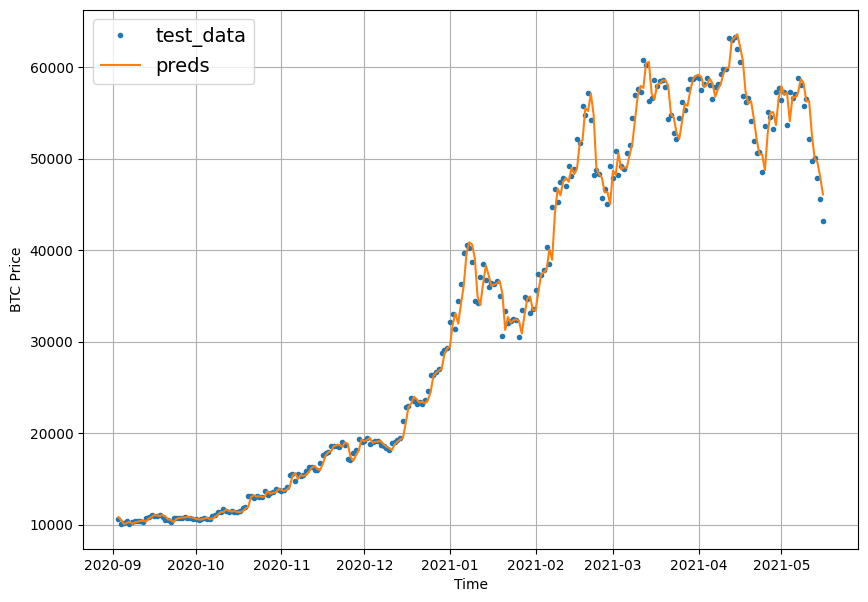

In [124]:
## Plotting the model performance
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=naive_forecast.index[:-1],
                 values = tf.reduce_mean(y_test, axis=1),
                 start=offset,
                 label='test_data')

plot_time_series(timesteps=naive_forecast.index[:-1],
                 values=tf.reduce_mean(model_5_preds, axis=1),
                 label='preds',
                 start=offset,
                 format='-')

##Multivariat time series dataset

In [125]:
btc_price[:5]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866])

In [126]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [127]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - df.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [128]:

# Add block_reward column
bitcoin_prices_block = df.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,currency,close,opne,high,low,block_reward
Date,,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349,25
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383,25
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833,25
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816,25
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566,25


In [129]:
btc_price = bitcoin_prices_block[['close', 'block_reward']]

In [130]:
btc_price.head()

,close,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


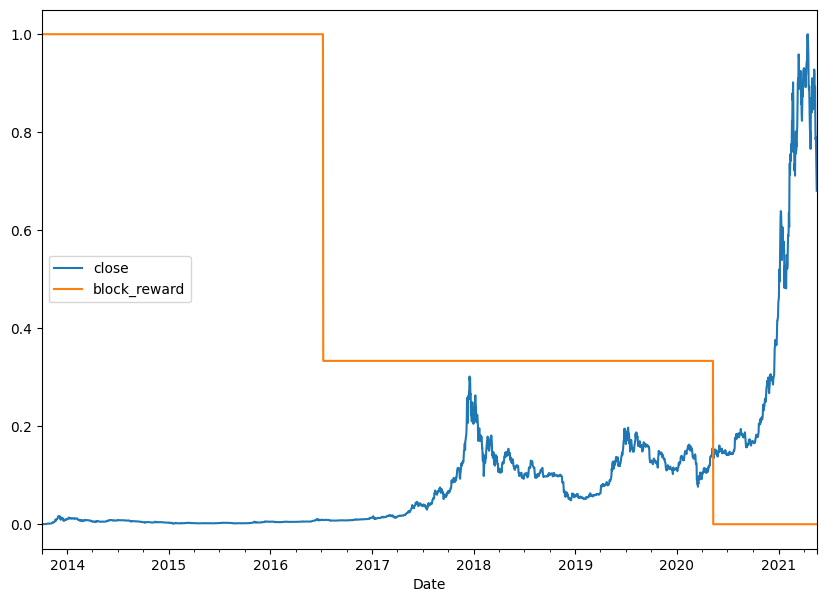

In [131]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(btc_price[["close", "block_reward"]]), # we need to scale the data first
                                     columns=btc_price.columns,
                                     index=btc_price.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making Windowed dataset using pandas

In [132]:
HORIZON = 1
WINDOW = 7

In [133]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = btc_price.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = btc_price["close"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,close,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [134]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("close", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["close"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [135]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: close, dtype: float32

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
len(X_train), len(X_test)

(2224, 556)

## Model_6: Dense(Multivariate time series)

In [137]:
tf.random.set_seed(42)

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

model_6.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae', 'mse'])
model_6.fit(X_train,
            y_train,
            epochs=100,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[model_checkpoint("Model_6")])

In [138]:
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 635.4935 - mae: 635.4935 - mse: 1288832.5000


[635.4934692382812, 635.4934692382812, 1288832.5]

In [140]:
model_6 = tf.keras.models.load_model('/content/model_experiment/Model_6')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 563.4858 - mae: 563.4858 - mse: 1147256.2500


[563.48583984375, 563.48583984375, 1147256.25]

In [141]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8821.982, 8756.549, 9026.089, 8748.141, 8720.26 , 8720.334,
       8665.328, 8495.837, 8440.07 , 8513.428], dtype=float32)>

In [142]:
model_6_results = calculate_evaluation_metrics(y_test, model_6_preds)
model_6_results

{'mae': 563.48584,
 'mse': 1147256.1,
 'rmse': 1071.1003,
 'mape': 2.5250113,
 'mase': 0.98988855}

##Model 7: N-BEATS algorithm

###Building and testing an N-BEATS block layer

In [143]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [144]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [145]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [146]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.05080438  0.5002811  -0.05694128  0.14262527 -0.31042814 -0.46741998
  0.2808075 ]
Forecast: -0.26672786474227905
